# Student Attendance Monitoring
The program below asks the user to input the student id and displays a table with attendance % of the respective student grouped by week and displays a bar chart for the same

## Imports

In [1]:
import sys
import pandas as pd
import sqlite3
import numpy as np
from ipynb.fs.defs.CW_Preprocessing import *
import matplotlib.pyplot as plt
plt.ioff()

## Student Attendance calculation program

In [2]:
def student_attendance(student,sel_module=None):
    """
    This function displays a table which shows weekly attendance of
    selected the modules of a student

    Parameters
    ----------
    student : int
        Student ID.
    sel_module : list, optional
        list of selected modules. The default is None.

    Returns
    -------
    output : TYPE
        DESCRIPTION.

    """
    
    if sel_module == None:
        table_list, sel_module, connection = sql_tables() 
    else:
        t, m, connection = sql_tables() 
    df_list = []
    for module in sel_module:
        sql_query = f'select Week,count(Attendance) as tot_classes,\
        sum(Attendance) as att_classes \
        from att_{module} inner join session_{module} \
        on att_{module}.Session_id = session_{module}.Session_id \
        where Student_ID={student} group by week '
        df = pd.read_sql_query(sql_query,connection)
        if df.empty:
            message= f"Student ID not present in {module}"
            print(message)
        else:
            df[module] = round((df["att_classes"]/df["tot_classes"])*100,0)
            df.drop(["att_classes","tot_classes"],axis=1,inplace = True)
            df_list.append(df)
    
    if len(df_list) == 0:
        output = "Student record not available in the selected modules"
        return output
    else:
        if len(df_list) !=1:
            df = df_list[0]
            for i in range(1,len(df_list)):
                df = df.merge(df_list[i],how="outer",on="Week")
        else:
            df = df_list[0]
        df["Week"]=df["Week"].astype(str)
        colors = df.applymap(color_cells)
        output,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 4))
        output.patch.set_facecolor('#e7e5e6')
        df.plot(kind = "bar",x="Week",y=sel_module, ax=ax2,)
        ax2.set_ylabel("Attendance %")
        table = ax1.table(cellText=df.values,
                          colLabels=df.columns,
                          cellColours=colors.values,
                          loc = 'center',cellLoc='center')
        ax1.axis('off')
        table.scale(1,2)
        plt.subplots_adjust(wspace = 0.35)        
        # table.set_fontsize(20)
        # plt.show()
    return output
    connection.close()

## Student Record
Select the student ID

Enter Student ID : 3


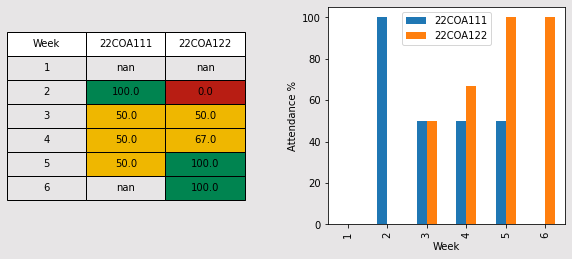

In [3]:
student_attendance(int(input("Enter Student ID : ")))